<a href="https://colab.research.google.com/github/sumyuck/ML-learning/blob/main/cvdl/CVDL_p_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

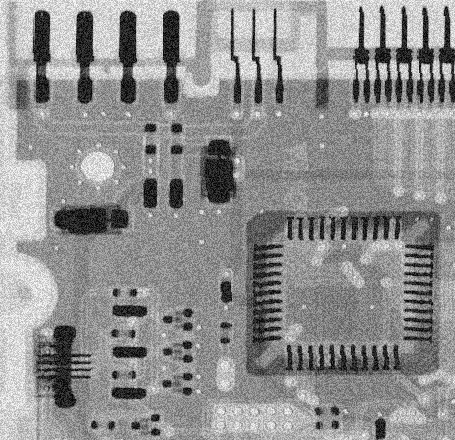

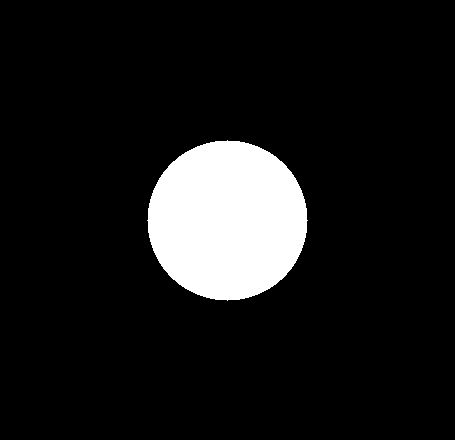

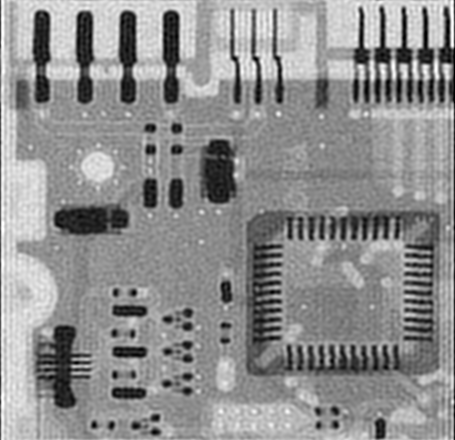

In [31]:
# Fourier Transform of Image using Ideal Low Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'fig5.12(a).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

m, n = img.shape

centered_img = img.astype(np.float32) * ((-1) ** (np.arange(m)[:, None] + np.arange(n)))

F = np.fft.fft2(centered_img)

cutoff = 80
u0, v0 = m // 2, n // 2
mask = np.zeros((m, n), dtype=float)

for u in range(m):
    for v in range(n):
        D = np.sqrt((u - u0) ** 2 + (v - v0) ** 2)
        if D <= cutoff:
            mask[u, v] = 1

F_filtered = F * mask

fourier_plot = (100.0 * np.log1p(np.abs(F_filtered))).astype(np.float32)
fourier_plot = fourier_plot.astype(np.float32)

f_back = np.fft.ifft2(F_filtered)
f_back = np.real(f_back)

final_img = f_back * ((-1) ** (np.arange(m)[:, None] + np.arange(n)))

cv2_imshow(img)
cv2_imshow(fourier_plot)
cv2_imshow(final_img)

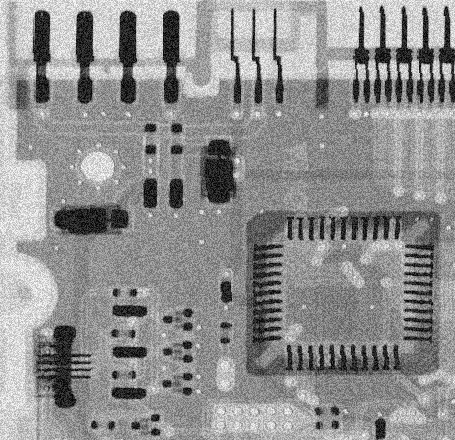

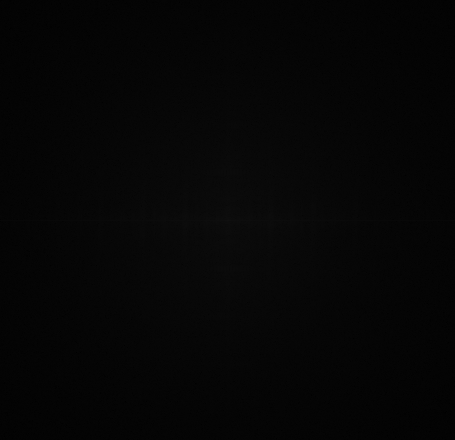

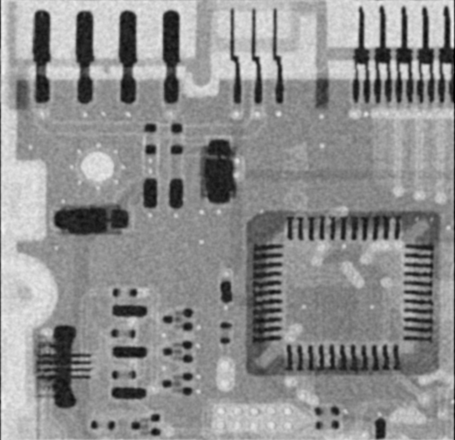

In [42]:
# Fourier Transform of Image using Butterworth Low Pass Filter

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'fig5.12(a).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

m, n = img.shape

centered_img = img.astype(np.float32) * ((-1) ** (np.arange(m)[:, None] + np.arange(n)))

F = np.fft.fft2(centered_img)

cutoff = 80
order = 2
u0, v0 = m // 2, n // 2
mask = np.zeros((m, n), dtype=float)

for u in range(m):
    for v in range(n):
        D = np.sqrt((u - u0) ** 2 + (v - v0) ** 2)
        mask[u, v] = 1 / (1 + (D / cutoff) ** (2 * order))

F_filtered = F * mask

fourier_plot = np.log1p(np.abs(F_filtered)).astype(np.float32)

f_back = np.fft.ifft2(F_filtered)
f_back = np.real(f_back)

final_img = f_back * ((-1) ** (np.arange(m)[:, None] + np.arange(n)))

cv2_imshow(img)
cv2_imshow(fourier_plot)
cv2_imshow(final_img)